In [35]:
import pandas_datareader.data as web
import datetime
import pandas as pd
from fredapi import Fred
fred = Fred(api_key="589cf170582c78433b3c562dad988b45")


# Key Macroeconomic FRED Series

This document summarizes five major macroeconomic indicators from FRED, including their definitions, calculation methods, frequency, and common uses in forecasting.

---

## 1️⃣ GNPCA — Real Gross National Product (Billions of Chained 2017 Dollars)

**What it measures:**  
- Total economic output produced by **U.S. residents**, including income from abroad.

**How it’s calculated:**  
$
\text{GNP} = \text{GDP} + \text{Net income from abroad}
$  
- **GDP**: Value of goods/services produced domestically.  
- **Net income from abroad**: Income residents earn from foreign investments minus income foreigners earn from U.S. investments.  

**Real vs Nominal:**  
- “Real” = inflation-adjusted to **2017 dollars** using chain-weighted price indexes.

**Frequency:** Annual  
**Source:** BEA (Bureau of Economic Analysis)  
**Notes:** Useful for long-term economic growth analysis; smoother than GDP due to inclusion of net foreign income.

---

## 2️⃣ GDP — Gross Domestic Product (Billions of Dollars)

**What it measures:**  
- Total value of goods and services **produced within U.S. borders**, regardless of producer nationality.

**How it’s calculated:**  
1. **Expenditure approach:**  
$
GDP = C + I + G + (X - M)
$  
- \(C\) = Consumption  
- \(I\) = Investment  
- \(G\) = Government spending  
- \(X - M\) = Exports minus Imports  

2. **Income approach:** Sum of wages, rents, interest, profits, and taxes minus subsidies.  
3. **Production approach:** Sum of value added at each production stage.

**Real vs Nominal:**  
- Real GDP = inflation-adjusted (usually chained dollars, e.g., 2017)  

**Frequency:** Quarterly / Annual  
**Source:** BEA  
**Notes:** Standard measure of economic growth.

---

## 3️⃣ UNRATE — Civilian Unemployment Rate (%)

**What it measures:**  
- % of the **civilian labor force that is unemployed but actively seeking work**.

**How it’s calculated:**  
$
\text{Unemployment Rate} = \frac{\text{Unemployed}}{\text{Labor Force}} \times 100
$  
- Labor force = employed + unemployed  
- Data from **Current Population Survey (CPS)** by BLS.

**Frequency:** Monthly  
**Seasonal adjustment:** Usually seasonally adjusted for short-term cycles.  

**Notes:** Leading indicator of economic health; used for inflation and monetary policy analysis.

---

## 4️⃣ CPIAUCSL — Consumer Price Index for All Urban Consumers: All Items (Index, 1982-84=100)

**What it measures:**  
- Average change in **prices paid by urban consumers** for a **fixed basket of goods & services**.

**How it’s calculated:**  
- Prices of ~80,000 items surveyed monthly across urban areas.  
- Basket weights based on expenditure patterns.  
- Index formula (Laspeyres-type):  
$
CPI = \frac{\sum p_t q_0}{\sum p_0 q_0} \times 100
$  
- \(p_t\) = price at time t, \(q_0\) = base-period quantities  

**Frequency:** Monthly  
**Seasonal adjustment:** Available (NSA and SA)  

**Notes:** Main inflation measure; used for real-dollar conversions and cost-of-living adjustments.

---

## 5️⃣ INDPRO — Industrial Production Index (2007=100)

**What it measures:**  
- Output of **manufacturing, mining, and utilities** in the U.S.  

**How it’s calculated:**  
- Uses **physical output data** from factories, mines, and utilities.  
- Weighted to reflect contribution to GDP:  
$
\text{INDPRO Index} = \frac{\text{Current production}}{\text{Base year production}} \times 100
$  
- Base year: 2007 = 100.

**Frequency:** Monthly  
**Seasonal adjustment:** Available  

**Notes:** Leading indicator of industrial activity; often used to forecast GDP cycles.

---

## ✅ Quick Comparison Table

| Series ID  | Metric Type | Frequency | Real/Nominal | Source | Key Use |
|------------|------------|-----------|--------------|--------|---------|
| GNPCA      | Total output (residents) | Annual | Real (2017 chained $) | BEA | Long-term growth analysis |
| GDP        | Total domestic output | Quarterly/Annual | Real or Nominal | BEA | Standard economic growth measure |
| UNRATE     | % Unemployed | Monthly | NA | BLS | Labor market, cyclical indicator |
| CPIAUCSL   | Price index | Monthly | Nominal (Index) | BLS | Inflation, real dollar conversion |
| INDPRO     | Industrial output | Monthly | Index (2007=100) | FED | Leading indicator for industrial & GDP trends |


In [36]:
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2025, 9, 1)

series_ids = ['GNPCA','GDP', 'UNRATE', 'CPIAUCSL', 'INDPRO']


df_fred = web.DataReader(series_ids, 'fred', start, end)

print(df_fred.head())
df_fred["GDP"].size


               GNPCA        GDP  UNRATE  CPIAUCSL    INDPRO
DATE                                                       
2023-01-01  22769.38  27164.359     3.5   300.456  102.7476
2023-02-01       NaN        NaN     3.6   301.476  102.8003
2023-03-01       NaN        NaN     3.5   301.643  102.8143
2023-04-01       NaN  27453.815     3.4   302.858  103.2241
2023-05-01       NaN        NaN     3.6   303.316  102.9809


32

In [37]:

# Vintage Data
vintage = []

for i in series_ids:
    vindata = fred.get_series(i, observation_start="2023-01-01" ,observation_end="2025-09-01")
    vintage.append(vindata)
print(len(vintage))
df_vintage = pd.DataFrame(vintage).T
df_vintage.columns = series_ids
print(df_vintage)
df_vintage["GDP"].size

5
                GNPCA        GDP  UNRATE  CPIAUCSL    INDPRO
2023-01-01  22769.380  27164.359     3.5   300.456  102.7476
2023-02-01        NaN        NaN     3.6   301.476  102.8003
2023-03-01        NaN        NaN     3.5   301.643  102.8143
2023-04-01        NaN  27453.815     3.4   302.858  103.2241
2023-05-01        NaN        NaN     3.6   303.316  102.9809
2023-06-01        NaN        NaN     3.6   304.099  102.3809
2023-07-01        NaN  27967.697     3.5   304.615  103.0722
2023-08-01        NaN        NaN     3.7   306.138  103.0951
2023-09-01        NaN        NaN     3.8   307.374  103.3081
2023-10-01        NaN  28296.967     3.9   307.653  102.5781
2023-11-01        NaN        NaN     3.7   308.087  102.8868
2023-12-01        NaN        NaN     3.8   308.735  102.6309
2024-01-01  23368.468  28624.069     3.7   309.794  101.4830
2024-02-01        NaN        NaN     3.9   311.022  102.7267
2024-03-01        NaN        NaN     3.9   312.107  102.5186
2024-04-01        NaN 

32

In [38]:
def nancounter(id, df):
    return df[id].isna().sum()

def valuecounter(id,df):
    return df[id].value_counts()



# High Frequency data

In [39]:
jobless_claims = fred.get_series("ICSA")
print(jobless_claims.tail())

sp500 = fred.get_series("SP500")
print(sp500.tail())

yields = pd.DataFrame({
    "1Y": fred.get_series("DGS1"),
    "2Y": fred.get_series("DGS2"),
    "10Y": fred.get_series("DGS10"),
    "30Y": fred.get_series("DGS30"),
})
print(yields.tail())

2025-08-16    234000.0
2025-08-23    229000.0
2025-08-30    236000.0
2025-09-06    264000.0
2025-09-13    231000.0
dtype: float64
2025-09-16    6606.76
2025-09-17    6600.35
2025-09-18    6631.96
2025-09-19    6664.36
2025-09-22    6693.75
dtype: float64
2025-09-16    6606.76
2025-09-17    6600.35
2025-09-18    6631.96
2025-09-19    6664.36
2025-09-22    6693.75
dtype: float64
              1Y    2Y   10Y   30Y
2025-09-15  3.64  3.54  4.05  4.66
2025-09-16  3.62  3.51  4.04  4.65
2025-09-17  3.60  3.52  4.06  4.66
2025-09-18  3.61  3.57  4.11  4.72
2025-09-19  3.60  3.57  4.14  4.75
              1Y    2Y   10Y   30Y
2025-09-15  3.64  3.54  4.05  4.66
2025-09-16  3.62  3.51  4.04  4.65
2025-09-17  3.60  3.52  4.06  4.66
2025-09-18  3.61  3.57  4.11  4.72
2025-09-19  3.60  3.57  4.14  4.75


# Plots and Graphs

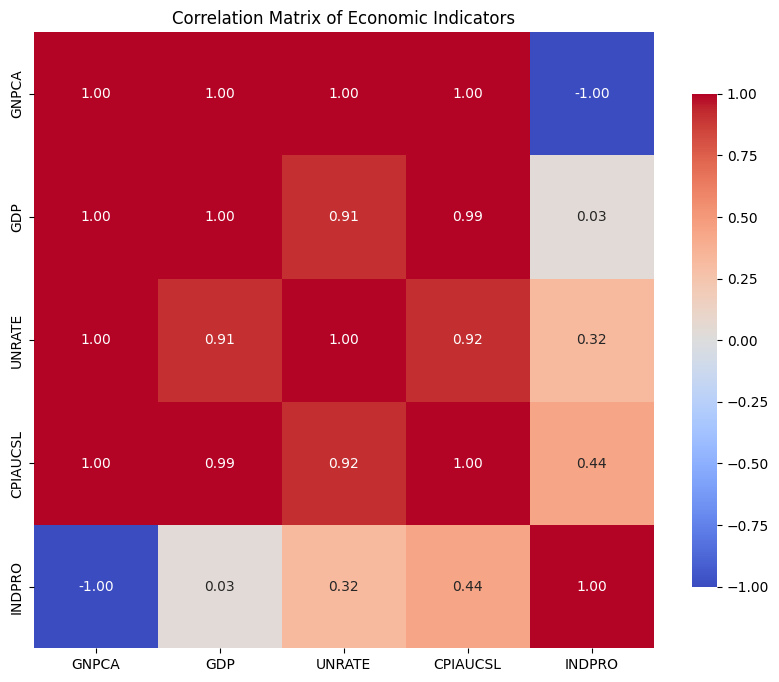

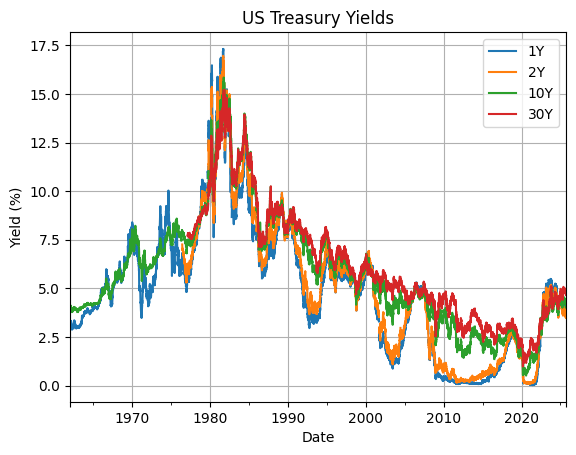

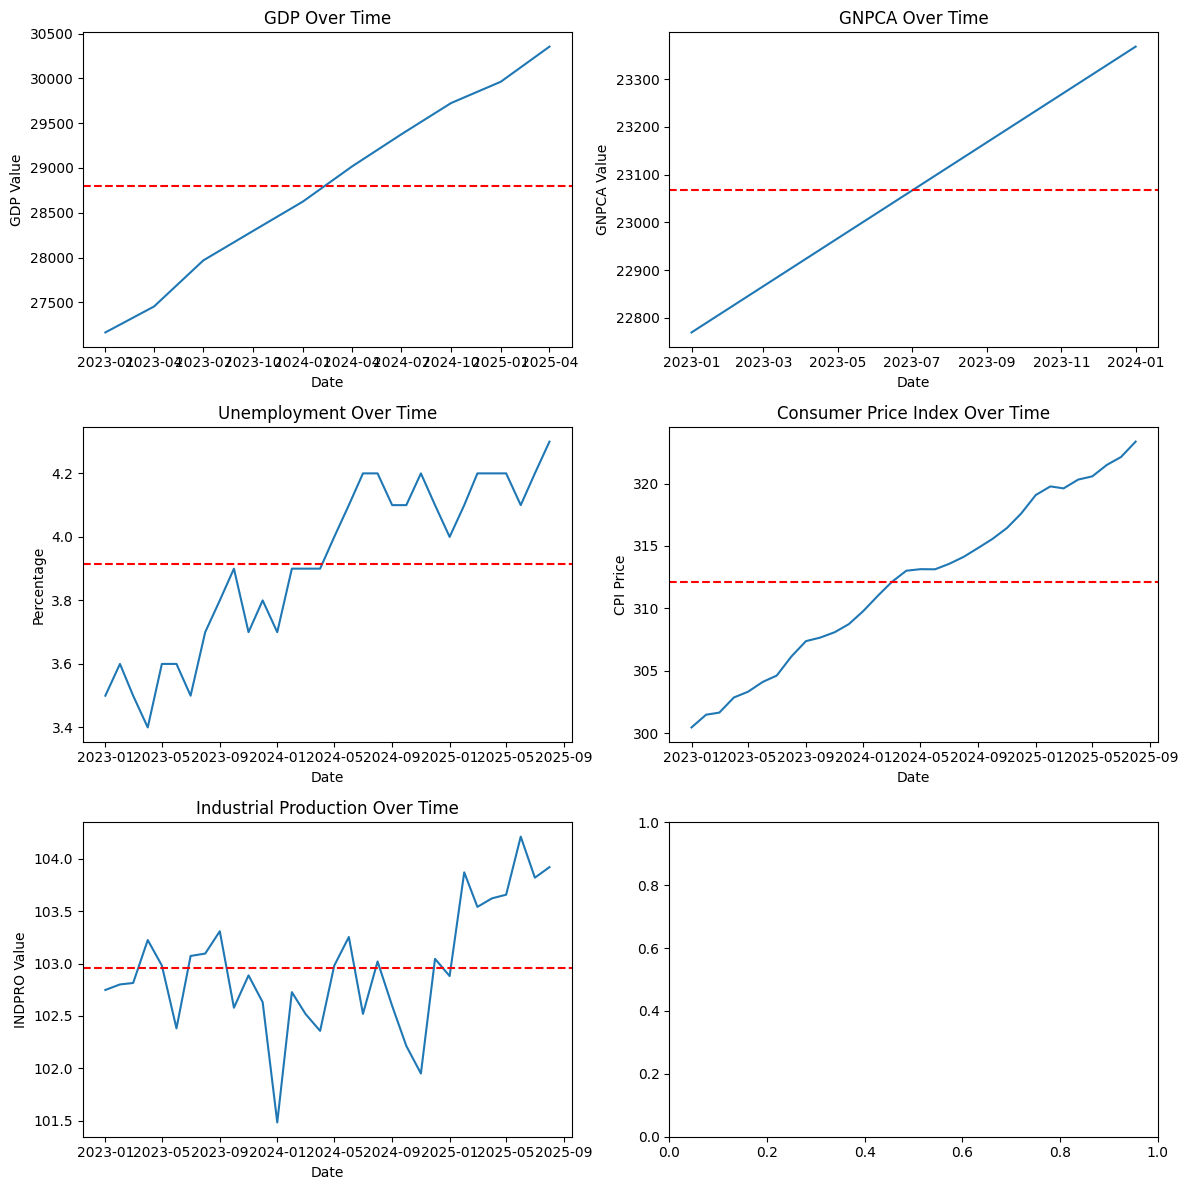

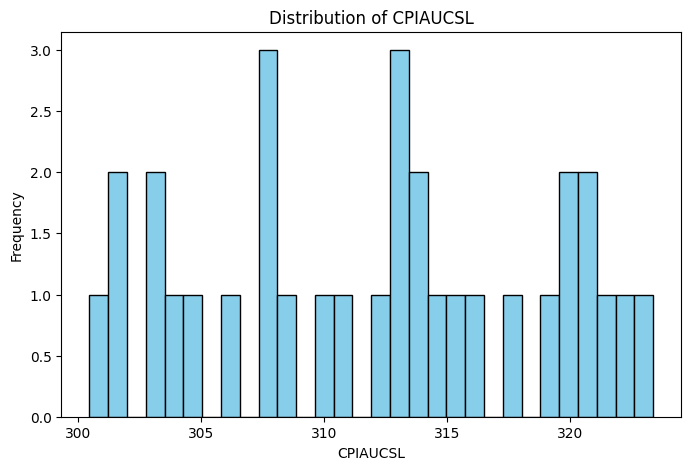

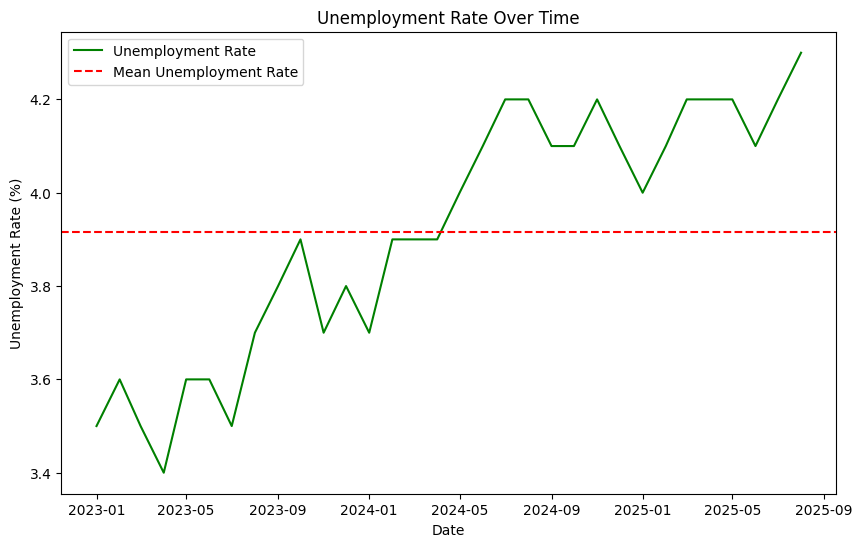

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1

corr = df_fred.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Economic Indicators")
plt.show()

yields.plot(title="US Treasury Yields")
plt.xlabel("Date")
plt.ylabel("Yield (%)")
plt.grid()
plt.show()


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

gdp = df_fred["GDP"][df_fred["GDP"].notna()]
axes[0,0].plot(gdp)
axes[0,0].axhline(y=gdp.mean(), color='red', linestyle='--', label='Mean GDP')
axes[0,0].set_title("GDP Over Time")
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('GDP Value')

gnpca = df_fred["GNPCA"][df_fred["GNPCA"].notna()]
axes[0,1].plot(gnpca)
axes[0,1].set_title("GNPCA Over Time")
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('GNPCA Value')
axes[0,1].axhline(y=gnpca.mean(), color='red', linestyle='--', label='Mean GNPCA')

axes[1,0].plot(df_fred["UNRATE"])
axes[1,0].set_title("Unemployment Over Time")
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Percentage')
axes[1,0].axhline(y=df_fred["UNRATE"].mean(), color='red', linestyle='--', label='Mean GNPCA')

axes[1,1].plot(df_fred["CPIAUCSL"])
axes[1,1].set_title("Consumer Price Index Over Time")
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('CPI Price')
axes[1,1].axhline(y=df_fred["CPIAUCSL"].mean(), color='red', linestyle='--', label='Mean GNPCA')

axes[2,0].plot(df_fred["INDPRO"])
axes[2,0].set_title("Industrial Production Over Time")
axes[2,0].set_xlabel('Date')
axes[2,0].set_ylabel('INDPRO Value')
axes[2,0].axhline(y=df_fred["INDPRO"].mean(), color='red', linestyle='--', label='Mean GNPCA')


plt.tight_layout()
plt.show()

dataframe_choice = df_fred


# Histogram
plt.figure(figsize=(8, 5))
dataframe_choice['CPIAUCSL'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of CPIAUCSL')
plt.xlabel('CPIAUCSL')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Line Plot with Annotations
plt.figure(figsize=(10, 6))
plt.plot(dataframe_choice['UNRATE'], label='Unemployment Rate', color='green')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.axhline(y=dataframe_choice['UNRATE'].mean(), color='red', linestyle='--', label='Mean Unemployment Rate')
plt.legend()        

**Title Forecasting Methods**

I will begin with MIDAS/ Mixed-Frequency VARs, State-Space Models and Kalman Filters, Bayesian Hierarchical Time-Series Models, Quantile Regression. 




# Theoretical Descriptions of Selected Time-Series and Forecasting Methods

## 1. MIDAS / Mixed-Frequency VARs

**Objective:**  
Model relationships between variables sampled at different frequencies (e.g., quarterly GDP and daily financial indicators).

### MIDAS Regression  
Given a low-frequency variable $y_t$ (e.g., quarterly) and high-frequency regressors $x_{t-k/m}$ (e.g., monthly/daily), the regression is:

$$
y_t = \beta_0 + \sum_{k=0}^{K} w(k; \theta) \, x_{t-k/m} + \varepsilon_t, \quad \varepsilon_t \sim \mathcal{N}(0, \sigma^2)
$$

- $w(k; \theta)$ are **parametric weighting functions** (e.g., exponential Almon lag polynomials) imposing smoothness:
$$
w(k; \theta) = \frac{\exp(\theta_1 k + \theta_2 k^2)}{\sum_{j=0}^{K} \exp(\theta_1 j + \theta_2 j^2)}
$$

- This avoids estimating a separate coefficient for every lag.

### Mixed-Frequency VAR  
For vectors $y_t^L$ (low-frequency) and $y_t^H$ (high-frequency), define a state vector sampled on the **highest frequency grid**, then restrict dynamics:

$$
\mathbf{y}_t = A_1 \mathbf{y}_{t-1} + \cdots + A_p \mathbf{y}_{t-p} + u_t, \quad u_t \sim \mathcal{N}(0, \Sigma)
$$

- Missing observations (due to differing frequencies) are handled by **aggregation constraints** or **state-space formulations**.  

---


In [41]:
#MIDAS/Mixed-Frequency VARs
import numpy as np

def data_prep_for_midas(k, x, theta_1, theta_2):
	# k should be a numpy array of lag indices, e.g. np.arange(len(x))
	numerator = np.exp(theta_1 * k + theta_2 * np.square(k))
	# Example: return weights for MIDAS lag polynomial
	denominator = np.sum(numerator)
	weights = numerator / denominator
	return weights



## 2. State-Space Models and Kalman Filters

**Objective:**  
Represent time-series as latent states evolving dynamically with noisy observations.

### General State-Space Form

- **State equation (latent process):**
$$
\mathbf{x}_{t} = F \mathbf{x}_{t-1} + G \mathbf{w}_{t}, \quad \mathbf{w}_{t} \sim \mathcal{N}(0, Q)
$$

- **Observation equation:**
$$
\mathbf{y}_{t} = H \mathbf{x}_{t} + \mathbf{v}_{t}, \quad \mathbf{v}_{t} \sim \mathcal{N}(0, R)
$$

Here:  
- $\mathbf{x}_t$: latent state vector  
- $\mathbf{y}_t$: observed data  
- $F, G, H$: system matrices  
- $Q, R$: covariance matrices of process and measurement noise.

### Kalman Filter (Recursive Estimation)

Given prior mean $\hat{x}_{t|t-1}$ and covariance $P_{t|t-1}$:

1. **Prediction step**  
$$
\hat{x}_{t|t-1} = F \hat{x}_{t-1|t-1}, \quad P_{t|t-1} = F P_{t-1|t-1} F^\top + Q
$$

2. **Update step**  
$$
K_t = P_{t|t-1} H^\top (H P_{t|t-1} H^\top + R)^{-1}
$$  
$$
\hat{x}_{t|t} = \hat{x}_{t|t-1} + K_t (y_t - H \hat{x}_{t|t-1})
$$  
$$
P_{t|t} = (I - K_t H) P_{t|t-1}
$$

---



**Objective:**  
Model conditional quantiles of a response, not just the mean.

### Definition

For quantile level $\tau \in (0,1)$, quantile regression solves:

$$
\hat{\beta}_\tau = \arg \min_{\beta \in \mathbb{R}^p} \sum_{t=1}^T \rho_\tau \big( y_t - \mathbf{x}_t^\top \beta \big)
$$

where the **check loss function** is:

$$
\rho_\tau(u) = u(\tau - \mathbf{1}\{u < 0\})
=
\begin{cases}
\tau u & u \geq 0 \\
(\tau - 1)u & u < 0
\end{cases}
$$

### Interpretation

- Estimated model:  
$$
Q_{y_t}(\tau \mid \mathbf{x}_t) = \mathbf{x}_t^\top \hat{\beta}_\tau
$$

- Provides the **conditional distribution shape** (tails, asymmetry, heteroskedasticity) instead of only mean.  
- Useful for risk management (e.g., Value-at-Risk).


## 3. Bayesian Hierarchical Time-Series Models

**Objective:**  
Pool information across related time-series while allowing for individual heterogeneity.

### General Structure

Suppose we have $N$ time-series $y_{i,t}$ (e.g., product sales across stores). A hierarchical model introduces **shared priors**:

- **Observation model** (e.g., regression or state-space):  
$$
y_{i,t} \sim p(y_{i,t} \mid \theta_i, \mathbf{x}_{i,t})
$$

- **Series-specific parameters:**  
$$
\theta_i \sim \mathcal{N}(\mu, \Sigma)
$$

- **Hyperpriors on global parameters:**  
$$
\mu \sim \mathcal{N}(\mu_0, \Lambda_0), \quad \Sigma \sim \mathcal{W}^{-1}(\nu_0, S_0)
$$

### Posterior Inference

The posterior combines all levels:

$$
p(\{\theta_i\}, \mu, \Sigma \mid \{y_{i,t}\}) \propto \prod_{i=1}^N \prod_{t=1}^T p(y_{i,t} \mid \theta_i) \, p(\theta_i \mid \mu, \Sigma) \, p(\mu, \Sigma)
$$

- Estimation: MCMC, variational Bayes, or integrated Kalman filters when state-space embedded.  
- Benefit: **“shrinkage”** — borrowing strength across series.

## 4. Quantile Regression

**Objective:**  
Model conditional quantiles of a response, not just the mean.

### Definition

For quantile level $\tau \in (0,1)$, quantile regression solves:

$$
\hat{\beta}_\tau = \arg \min_{\beta \in \mathbb{R}^p} \sum_{t=1}^T \rho_\tau \big( y_t - \mathbf{x}_t^\top \beta \big)
$$

where the **check loss function** is:

$$
\rho_\tau(u) = u(\tau - \mathbf{1}\{u < 0\})
=
\begin{cases}
\tau u & u \geq 0 \\
(\tau - 1)u & u < 0
\end{cases}
$$

### Interpretation

- Estimated model:  
$$
Q_{y_t}(\tau \mid \mathbf{x}_t) = \mathbf{x}_t^\top \hat{\beta}_\tau
$$

- Provides the **conditional distribution shape** (tails, asymmetry, heteroskedasticity) instead of only mean.  
- Useful for risk management (e.g., Value-at-Risk).

# MIDAS regression with multiple high-frequency predictors

If you have P high-frequency predictors (\(x_{1},\dots,x_{P}\)), each predictor can have its own lag length and weight parameters. A clean MIDAS specification is:

$$
y_t = \beta_0 + \sum_{p=1}^{P} \beta_p \left( \sum_{k=0}^{K_p} w_p(k;\theta_p)  x_{p,t - k/m_p} \right) + \varepsilon_t,\quad \varepsilon_t \\sim \mathcal{N}(0,\sigma^2)
$$

Notes:
- \(p\) indexes predictors; \(K_p\) is the max high-frequency lag for predictor \(p\) (so it contributes \(K_p+1\) terms).
- \(m_p\) is the frequency ratio (e.g., months per quarter). In practice you align timestamps so the aggregated high-frequency block maps to each low-frequency \(y_t\).
- \(w_p(k;\theta_p)\) is a parametric weight function (e.g., exponential-Almon).
- \(\beta_p\) scales the aggregated predictor in the low-frequency regression.

Compact form: define the weighted aggregate for each predictor
$$
X_{p,t} = \sum_{k=0}^{K_p} w_p(k;\theta_p)  x_{p,t-k/m_p},
$$
then
$$
y = \beta_0 \\mathbf{1} + X \beta + \varepsilon, \quad X = [X_1, \dots, X_P], \; \beta = [\beta_1,\dots,\beta_P]^\top.
$$

Estimation tips:
- For fixed \(\theta_p\), the model is linear in \(\beta\) and you can estimate \(\beta\) by OLS (or GLS).
- Common practice: profile estimation — search over \(\theta\) (nonlinear), and for each candidate compute OLS for \(\beta\); choose \(\theta\) that minimizes SSE.
- Choose \(K_p\) using domain knowledge, information criteria, or cross-validation. Use a large \(K_p\) with a smooth weight function if you want long memory with few parameters.
- Align timestamps carefully: decide which high-frequency dates correspond to each low-frequency \(y_t\) (last period, average, or other convention).

In [42]:
# Nowcast example using collected FRED data: GDP, UNRATE, INDPRO, CPI -> predict 1Y yield
import numpy as np
import pandas as pd
from numpy.linalg import lstsq
import warnings
warnings.filterwarnings('ignore')

def exp_almon_weights(K, theta1, theta2):
    k = np.arange(0, K+1)
    v = theta1 * k + theta2 * (k**2)
    exps = np.exp(v - v.max())  # numerical stability
    return exps / exps.sum()

def aggregate_series(s, K, theta1, theta2):
    # s: pandas Series indexed by dates (assumed regularly spaced at high freq)
    W = exp_almon_weights(K, theta1, theta2)
    n = len(s)
    if n <= K:
        raise ValueError('series too short for chosen K')
    rows = [s.values[t - np.arange(0, K+1)] for t in range(K, n)]
    Xlags = np.vstack(rows)
    return pd.Series(Xlags @ W, index=s.index[K:])

# -- Prepare data from earlier cells --
# df_fred contains columns: GNPCA, GDP, UNRATE, CPIAUCSL, INDPRO
# yields contains treasury yields (1Y,2Y,10Y,30Y)
# choose target yield column to nowcast:
target_yield = '1y'
if 'df_fred' not in globals() or 'yields' not in globals():
    raise RuntimeError('Make sure you have run the earlier cells that build df_fred and yields')

# select predictors and coerce to pandas Series
preds = {
    'GDP': df_fred['GDP'],
    'UNRATE': df_fred['UNRATE'],
    'INDPRO': df_fred['INDPRO'],
    'CPI': df_fred['CPIAUCSL'],
}

# Align frequencies: use yields.index as the target (monthly). For GDP (quarterly) forward-fill to monthly.
y_idx = yields.index
preds_monthly = {}
for name, s in preds.items():
    # reindex to yields' dates; forward-fill to carry lower-frequency values forward
    s_month = s.reindex(y_idx)
    s_month = s_month.fillna(method='ffill')
    preds_monthly[name] = s_month

# Drop any remaining NaNs (e.g., before start of series)
combined = pd.DataFrame(preds_monthly)
combined[target_yield] = yields[target_yield] if target_yield in yields.columns else yields.iloc[:,0]
combined = combined.dropna()
if combined.empty:
    raise RuntimeError('No overlapping observations between predictors and target yields after alignment')

# Aggregation settings (in months): choose K (max lag) and theta for each predictor.
# Here we pick K=5 (6 months) and small negative theta1 so recent months get more weight.
K = 2
thetas = {'GDP':(-0.8,0.01), 'UNRATE':(0,0.0), 'INDPRO':(0,0), 'CPI':(0,0)}

# Build aggregated predictors aligned to the same index as combined[target_yield]
agg_dict = {}
for name, series in preds_monthly.items():
    # aggregate returns values indexed from K: so reindex to combined.index by taking the intersection
    agg = aggregate_series(series, K=K, theta1=thetas[name][0], theta2=thetas[name][1])
    agg = agg.reindex(combined.index).dropna()
    agg_dict[name] = agg

# Build final DataFrame for estimation (align across all aggs and target)
df_est = pd.DataFrame(agg_dict).join(combined[target_yield]).dropna()
df_est.columns = list(agg_dict.keys()) + [target_yield]

# Design matrix: intercept + aggregated predictors
X = np.column_stack([np.ones(len(df_est))] + [df_est[name].values for name in agg_dict.keys()])
y = df_est[target_yield].values

# OLS via least squares (conditional on theta fixed)
beta_hat, *_ = lstsq(X, y, rcond=None)
intercept = beta_hat[0]
betas = beta_hat[1:]

print('Nowcasting target yield:', target_yield)
print('Observation window:', df_est.index.min(), 'to', df_est.index.max())
print('Intercept:', round(intercept,6))
for name, b in zip(agg_dict.keys(), betas):
    print(f'Beta ({name}):', round(b,6))
print('RMSE:', round(np.sqrt(np.mean((y - X @ beta_hat)**2)),6))

# Quick one-step nowcast: predict the last available date in df_est (in-sample)
y_pred_last = (X[-1] @ beta_hat)
print('Last date:', df_est.index[-1], 'Observed:', y[-1], 'Predicted:', round(y_pred_last,6))

# Notes: this is a simple baseline. Next steps: (1) profile/estimate theta by nonlinear search,
# (2) add regularization or GMM/GLS if errors are heteroskedastic, (3) produce out-of-sample nowcasts.


Nowcasting target yield: 1y
Observation window: 2024-01-03 00:00:00 to 2025-09-19 00:00:00
Intercept: 16.531747
Beta (GDP): -0.000494
Beta (UNRATE): -0.330078
Beta (INDPRO): 0.128464
Beta (CPI): -0.029585
RMSE: 0.22346
Last date: 2025-09-19 00:00:00 Observed: 3.6 Predicted: 3.911021
